<a href="https://colab.research.google.com/github/pilgyeong/Business-Analysis/blob/main/HumanResources_PJT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **비즈니스 인사 부문 분석과제:**
**어떤 특성을 가진 직원들이 퇴사할 가능성이 높은지 예측**

<br>

---

<br>

### '인사(Human Resources)' 관점의 비즈니스 문제
- "10명 중 3명은 조기 퇴사한다": 2021년 취업포털 사람인HR에서 500개 기업을 대상으로 '1년 이내 조기 퇴사' 현황 조사에 따르면, 신규 입사자 중 약 28%는 조기 퇴사하는 것으로 나타남
- 인사담당자의 직관상 퇴사사유는 직무적성이 안 맞아서(48%), 조직문화 불만족(31%), 급여 및 복리후생 불만족(28.2%), 높은 근무강도(20.4%) 순으로 꼽음
- 한국고용정보원의 대졸자 직업이동 경로조사 연구에서 조기이직을 예측하는 데 유용할 것으로 추정되는 30개의 변수에 대한 분석 결과, 월평균초임(96.2), 직장만족도(16.9), 직무만족도(13.3) 순으로 나타남

<br>

### 데이터 분석가 또는 데이터 사이언티스트 관점에서 퇴사 예측할 수는 없을까??
- 해외 모기업 인사팀에서 수집한 인사 관련 Dataset을 활용하여 예측 모델링을 해볼 수 있을까?

## 0. 환경설정
- Google Drive Mount
- Settings for Data Visualization
- Import default library
- Load Dataset

In [1]:
'''=================='''
'''Google Drive Mount'''
'''=================='''

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''==============================='''
'''Settings for Data Visualization'''
'''==============================='''

# 시스템 환경에 따른 기본폰트 설정하는 함수
def get_font_family():
  import platform
  systemName = platform.system()
  if systemName == 'Darwin':
    font_family = 'AppleGothic'
  elif systemName == 'Windows':
    font_family = 'Malgun Gothic'
  else:
    # Linux
    !apt-get install fonts-nanum -qq  > /dev/null
    !fc-cache -fv
    import matplotlib as mpl
    mpl.font_manager._rebuild()
    findfont = mpl.font_manager.fontManager.findfont
    mpl.font_manager.findfont = findfont
    mpl.backends.backend_agg.findfont = findfont
    font_family = "NanumBarunGothic"
  return font_family

# 시각화 유형별 스타일 설정
import matplotlib.pyplot as plt
font_family = get_font_family()
plt.style.use("ggplot")
plt.rc("font", family=font_family)
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [3]:
'''======================'''
'''Import default library'''
'''======================'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model KPI
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [131]:
'''============'''
'''Load Dataset'''
'''============'''

path = '/content/drive/MyDrive/Colab Notebooks/business_datascience/HumanResources/human_resources.csv'

data = pd.read_csv(path)

## 1. 탐색적 데이터 분석 (Exploratory Data Analysis)


### 1-1. 간단한 데이터 탐색
- columns: 어떤 컬럼들이 있는지
- shape: 데이터 형태가 어떤지
- head(), tail(): 맨위/맨아래 데이터값은 어떤지
- info(): 컬럼별 데이터개수와 데이터타입은 무엇인지
- describe(): 간단한 통계값들은 어떤지
- isnull().sum(): 컬럼별 null값의 몇 개인지

In [132]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [133]:
data.shape

(1470, 35)

In [134]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [135]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [137]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [138]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### 1-2. 시각화를 통한 데이터 탐색 전 데이터 정제
- Domain 지식을 활용하여 무의미한 데이터 DROP(삭제)
- NULL값 처리
- 다양한 '여부' 데이터를 boolean(1,0)값으로 변환

**Domain 지식 활용 데이터 DROP**

In [139]:
# 직원번호(EmployeeNumber), 직원수(EmployeeCount), 표준시간(StandardHours), 18세이상여부(Over18)는 분석에 영향을 미치는 요소가 아니므로 삭제
data.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

**NULL값 처리**

In [140]:
# NULL값은 없어서 Pass
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

**여부 데이터 변환**

In [141]:
# '여부(Y/N, Yes/No)' 데이터는 모두 1과 0으로 변경
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
data['OverTime'] = data['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

### 1-3. 시각화를 통한 데이터 탐색

시각화 데이터 탐색 전
- 문자 데이터 처리
- NULL값 처리
- 여부 데잍

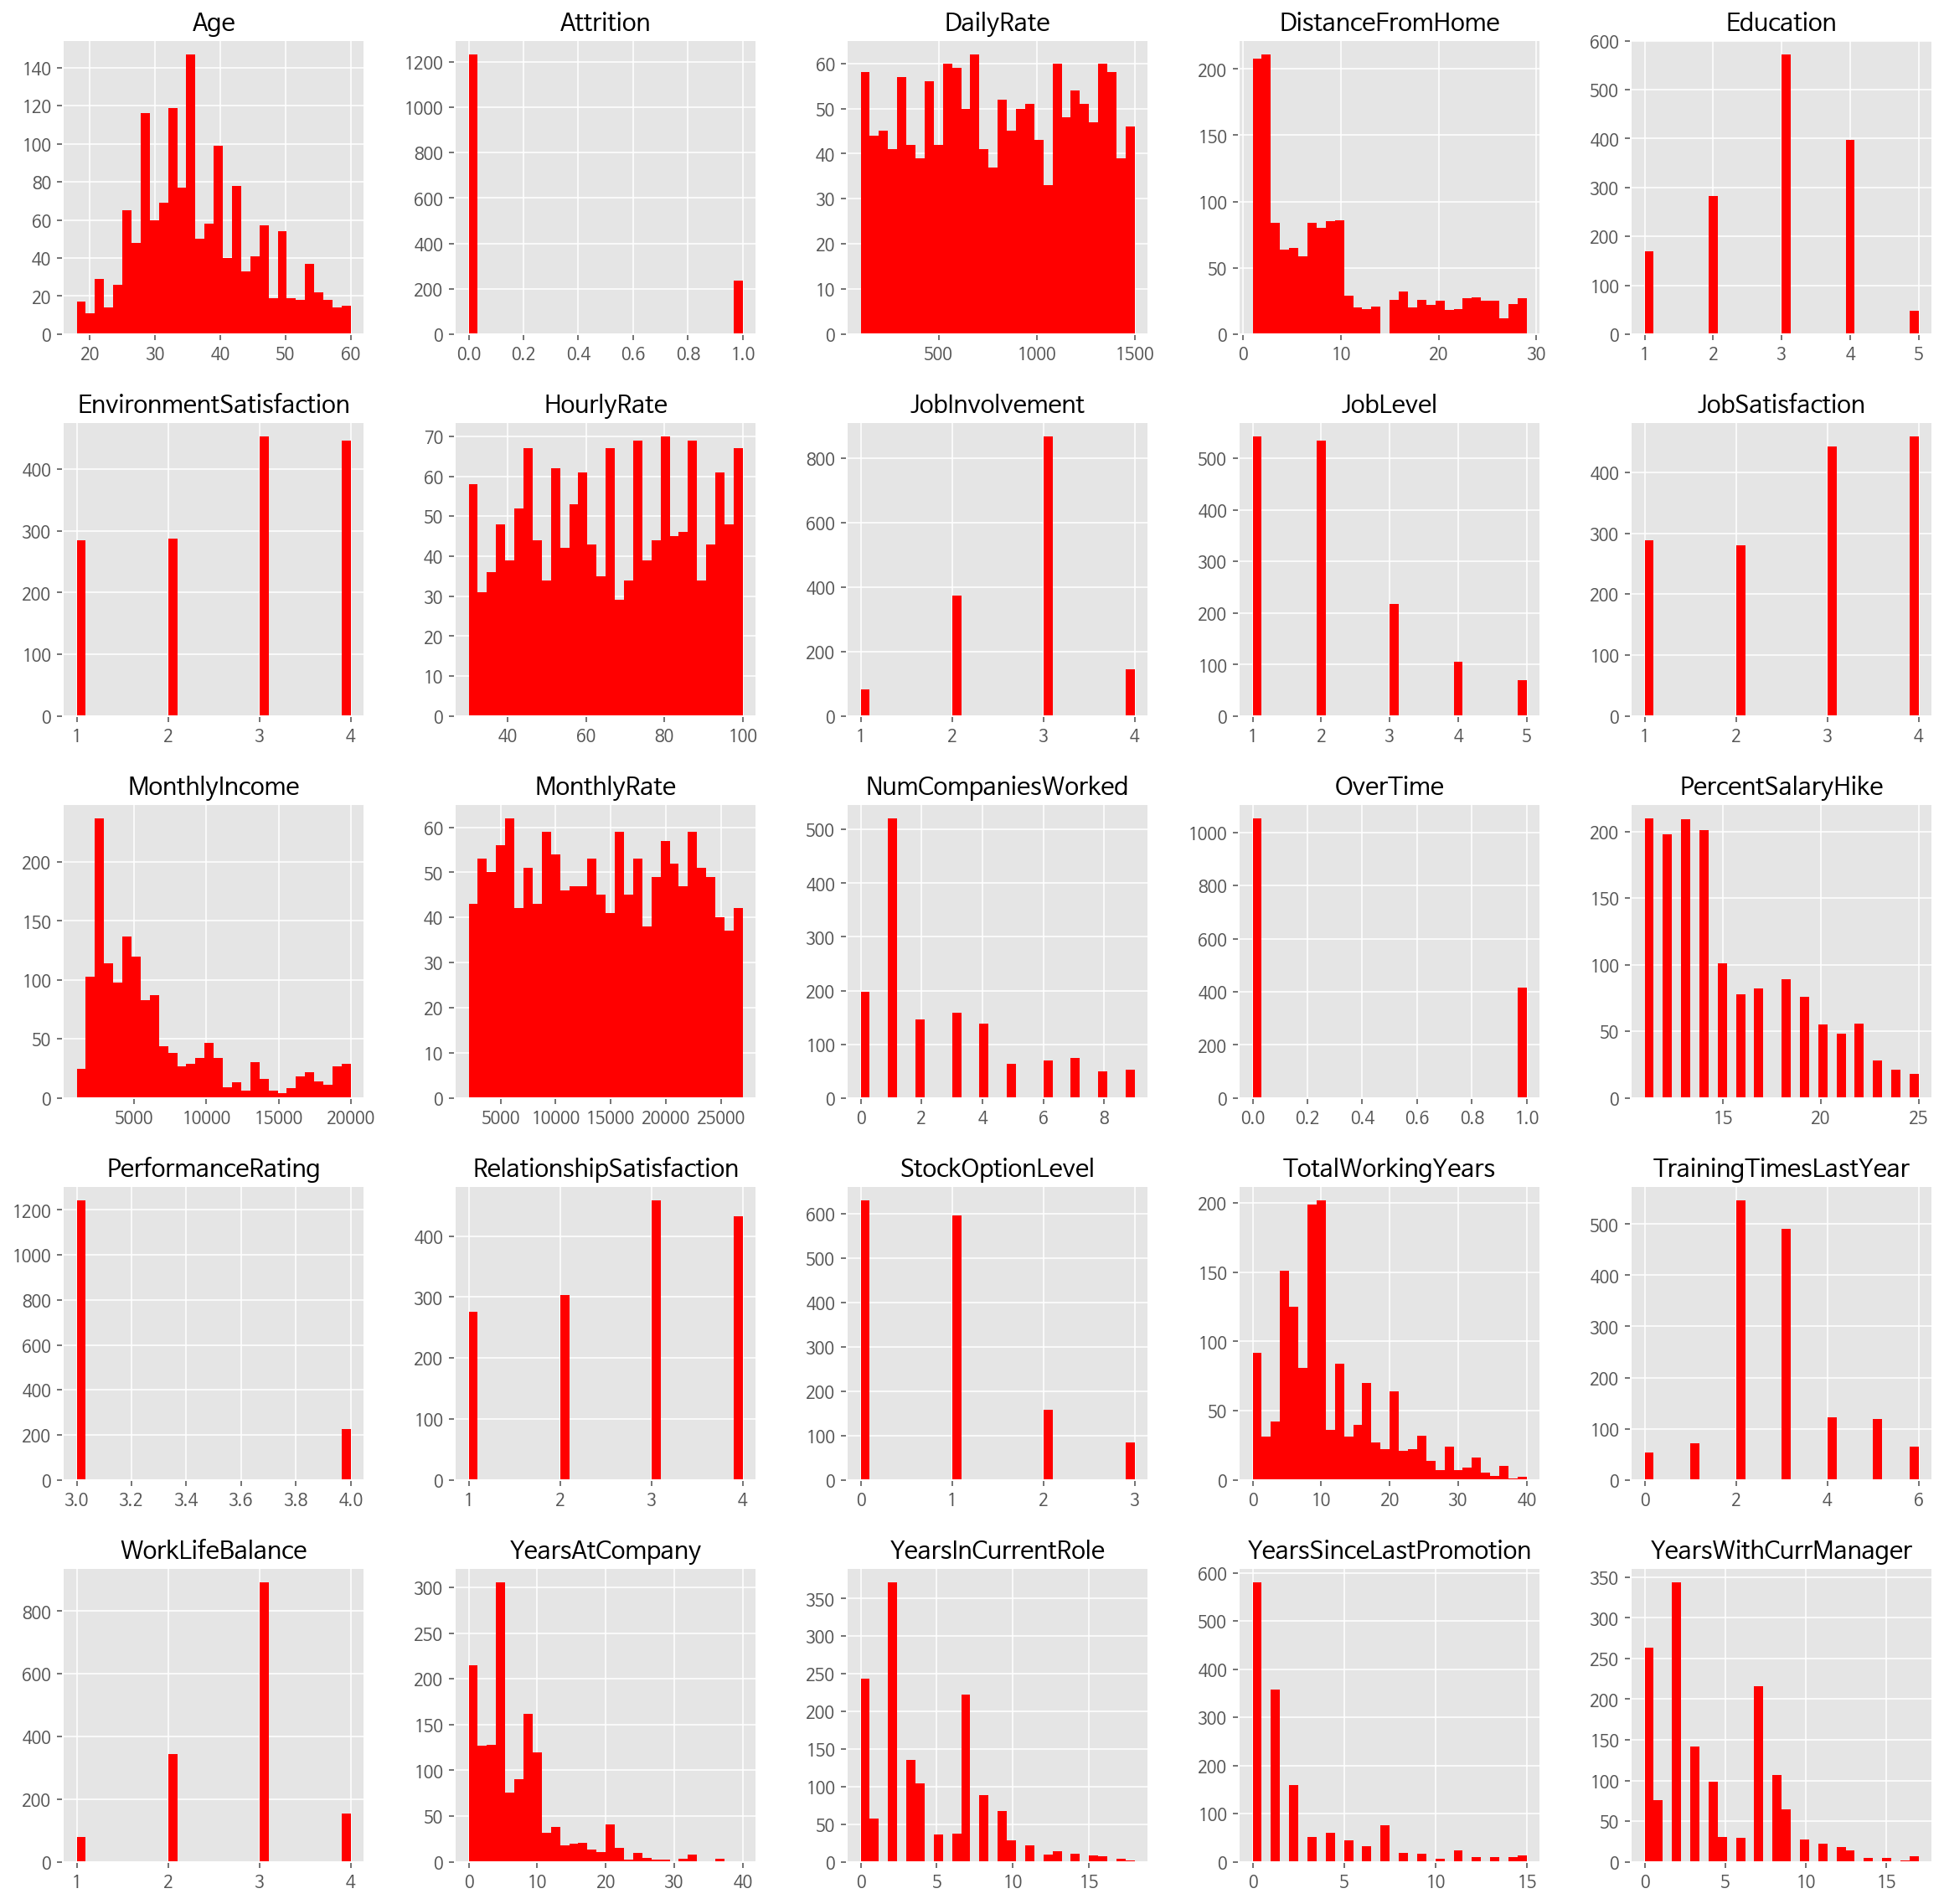

In [142]:
# 모든 Columns 데이터의 분포를 한 눈에 확인하기 위해 히스토그램(histogram)
data.hist(bins = 30, figsize = (20,20), color = 'r');

In [143]:
# 누가 회사를 떠났고(left), 남아있는지(stayed)를 확인
left_data        = data[data['Attrition'] == 1]
stayed_data      = data[data['Attrition'] == 0]

In [144]:
# 남은 직원(stayed), 떠난 직원(left)의 빈도수 세기

print("Total =", len(data))

print("떠난 직원 수 =", len(left_data))
print("퇴사자 비율 =", 1.*len(left_data)/len(data)*100.0, "%")
 
print("남은 직원 수 =", len(stayed_data))
print("비퇴사자 비율 =", 1.*len(stayed_data)/len(data)*100.0, "%")

Total = 1470
떠난 직원 수 = 237
퇴사자 비율 = 16.122448979591837 %
남은 직원 수 = 1233
비퇴사자 비율 = 83.87755102040816 %


**퇴사한 직원(left), 남은 직원(stayed) 데이터의 특성 탐색**
- 연령(age): 퇴사한 직원에 비해 남은 직원의 평균 연령이 높음
- 직장거리(DistanceFromHome): 퇴사한 직원에 비해 남은 직원의 평균 직장거리가 더 가까움
- 스톡옵션(StockOptionLevel): 퇴사한 직원에 비해 남은 직원의 평균 스톡옵션이 더 높음

이렇게 두 집단간의 각종 통계치(describe)를 보며, '비교포인트'를 잡아야 됨

In [145]:
left_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [146]:
stayed_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


**각 변수별 상관계수 행렬(Correlation coefficient matrix)을 보며 변수간 높은 상관관계를 갖는 변수쌍 탐색** (matrix은 sns.heatmap을 통해 구현)
- 작업수준(JobLevel) - 월소득(MonthlyIncome)
- 작업수준(JobLevel) - 총근로연수(TotalWorkingYears)
- 월소득(MonthlyIncome) - 총근로연수(TotalWorkingYears)

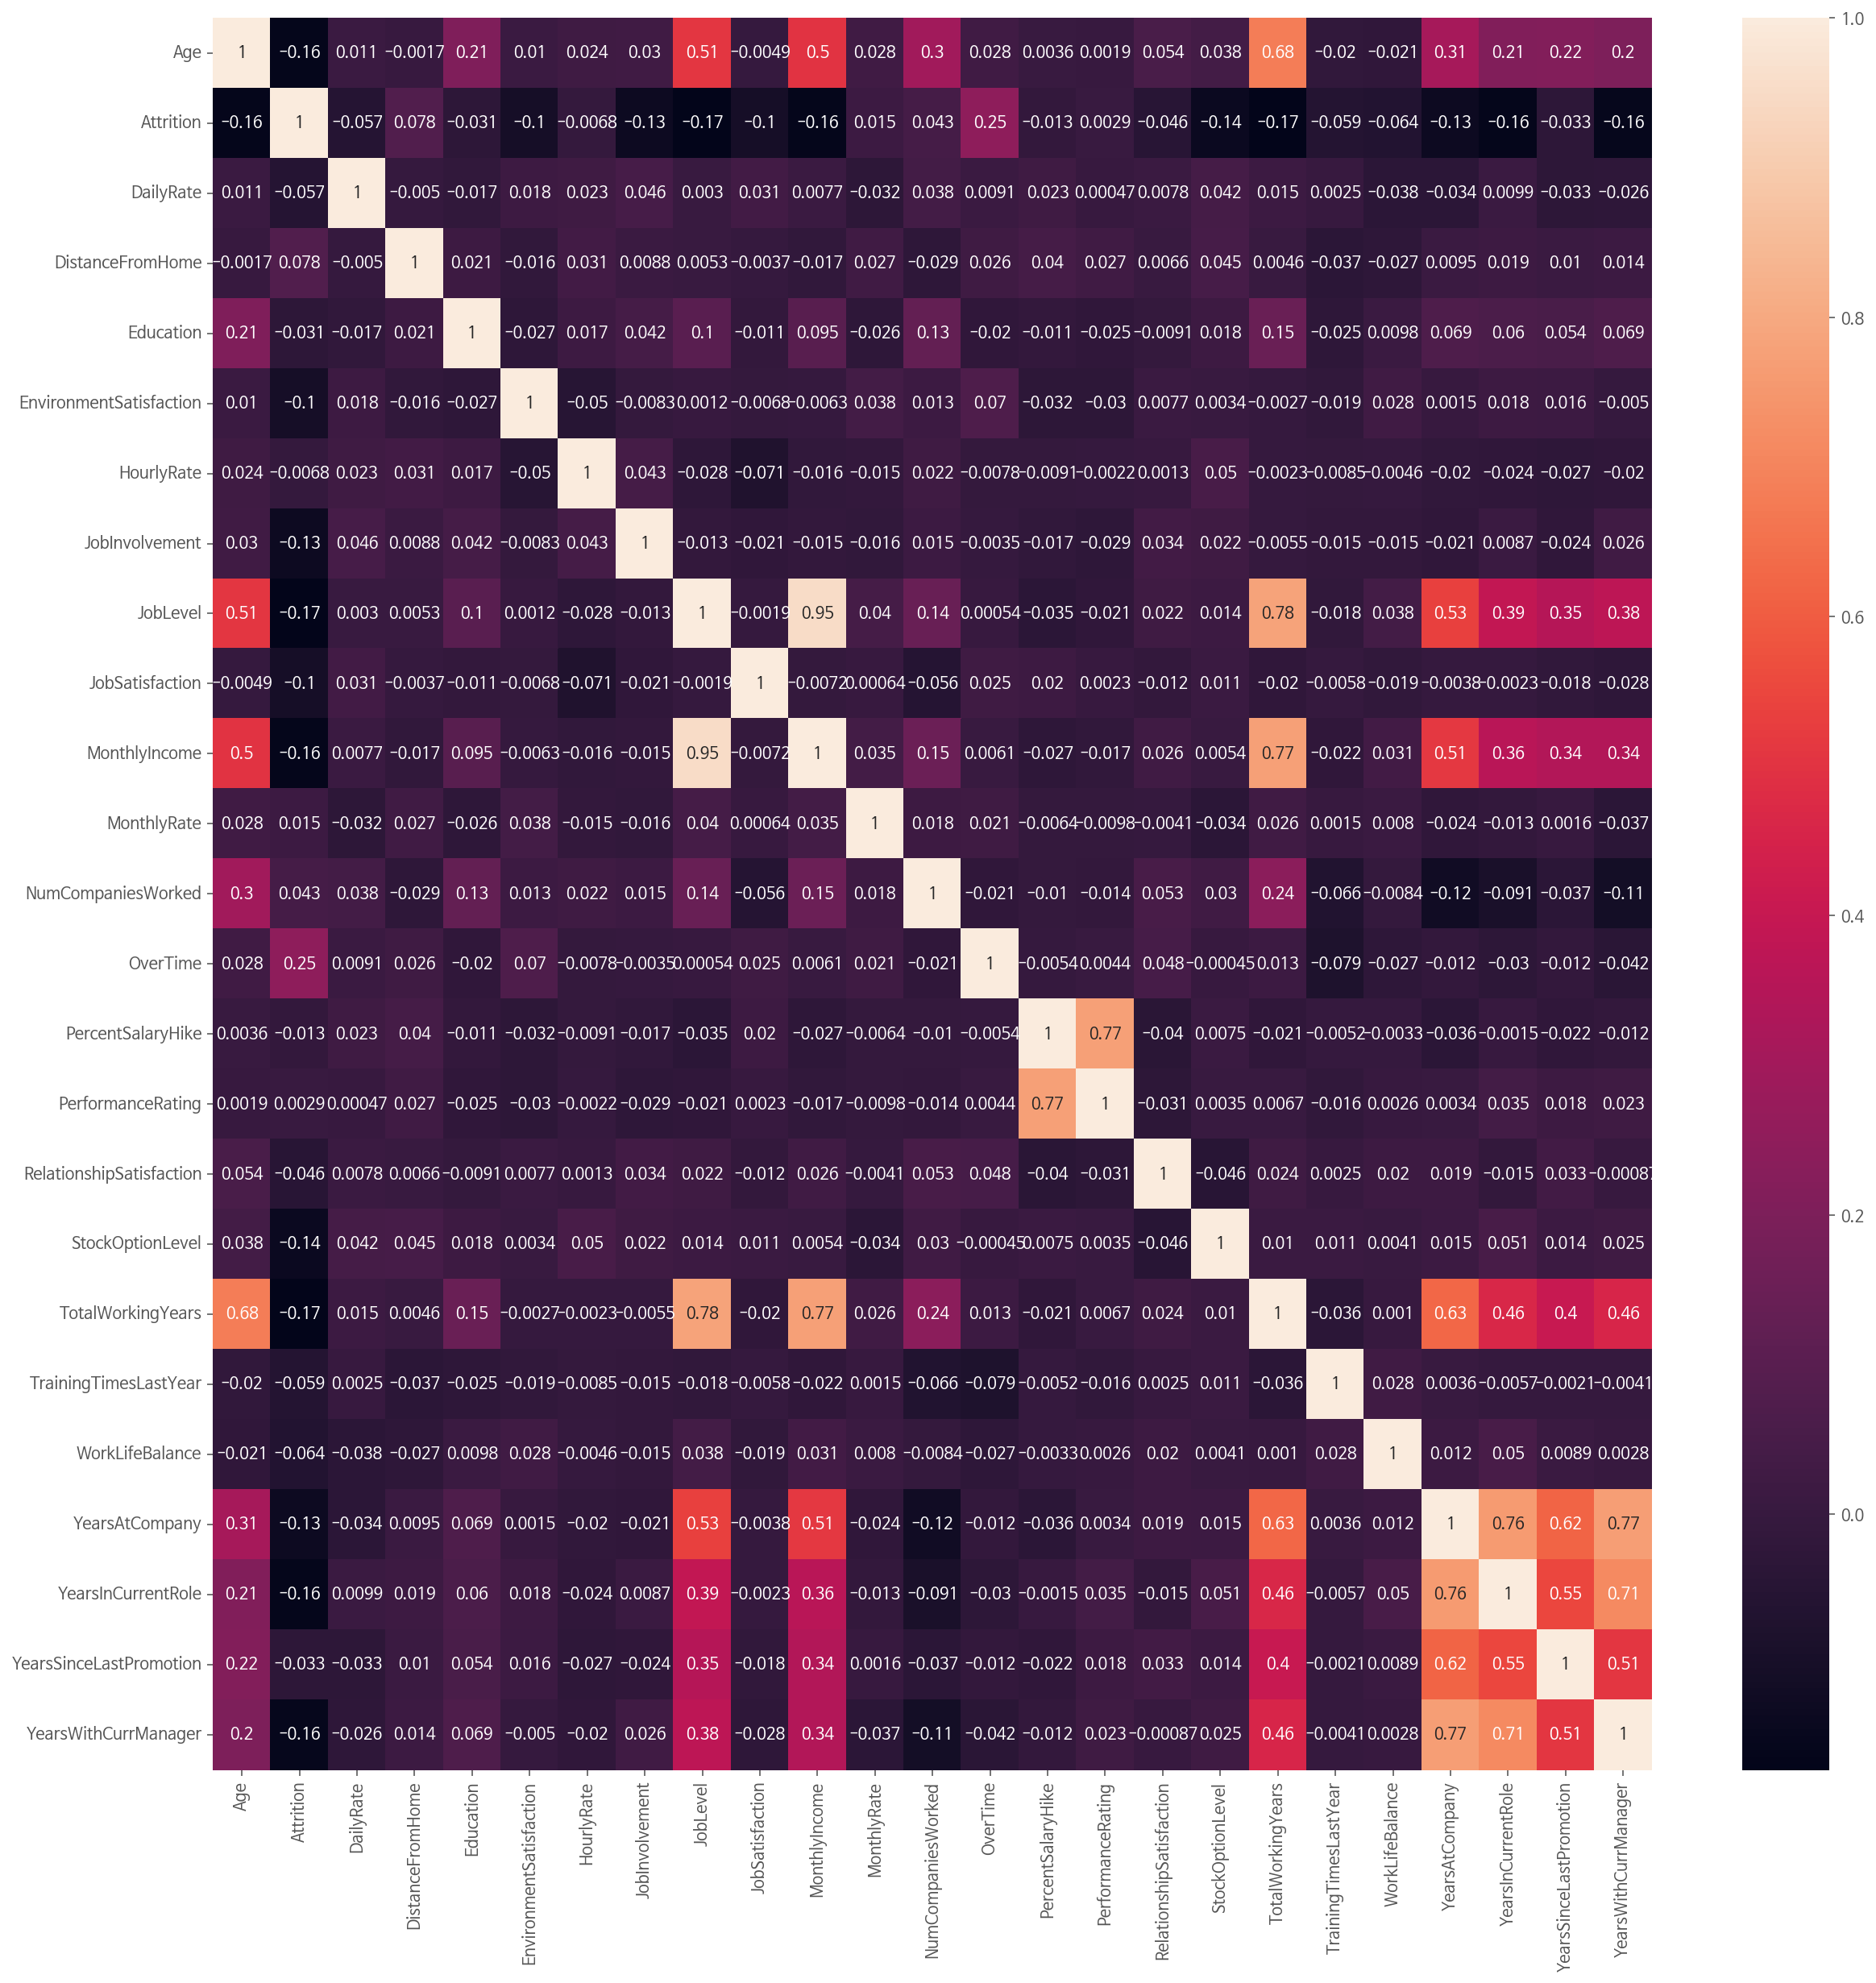

In [147]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True);

**left/stayed별 각 데이터 요소(변수값)의 분포 탐색**
- 연령(age)
- 직무(JobRole)
- 혼인상태별(MaritalStatus)
- 직무참여도(JobInvolvement)
- 직무난이도(JobLevel)

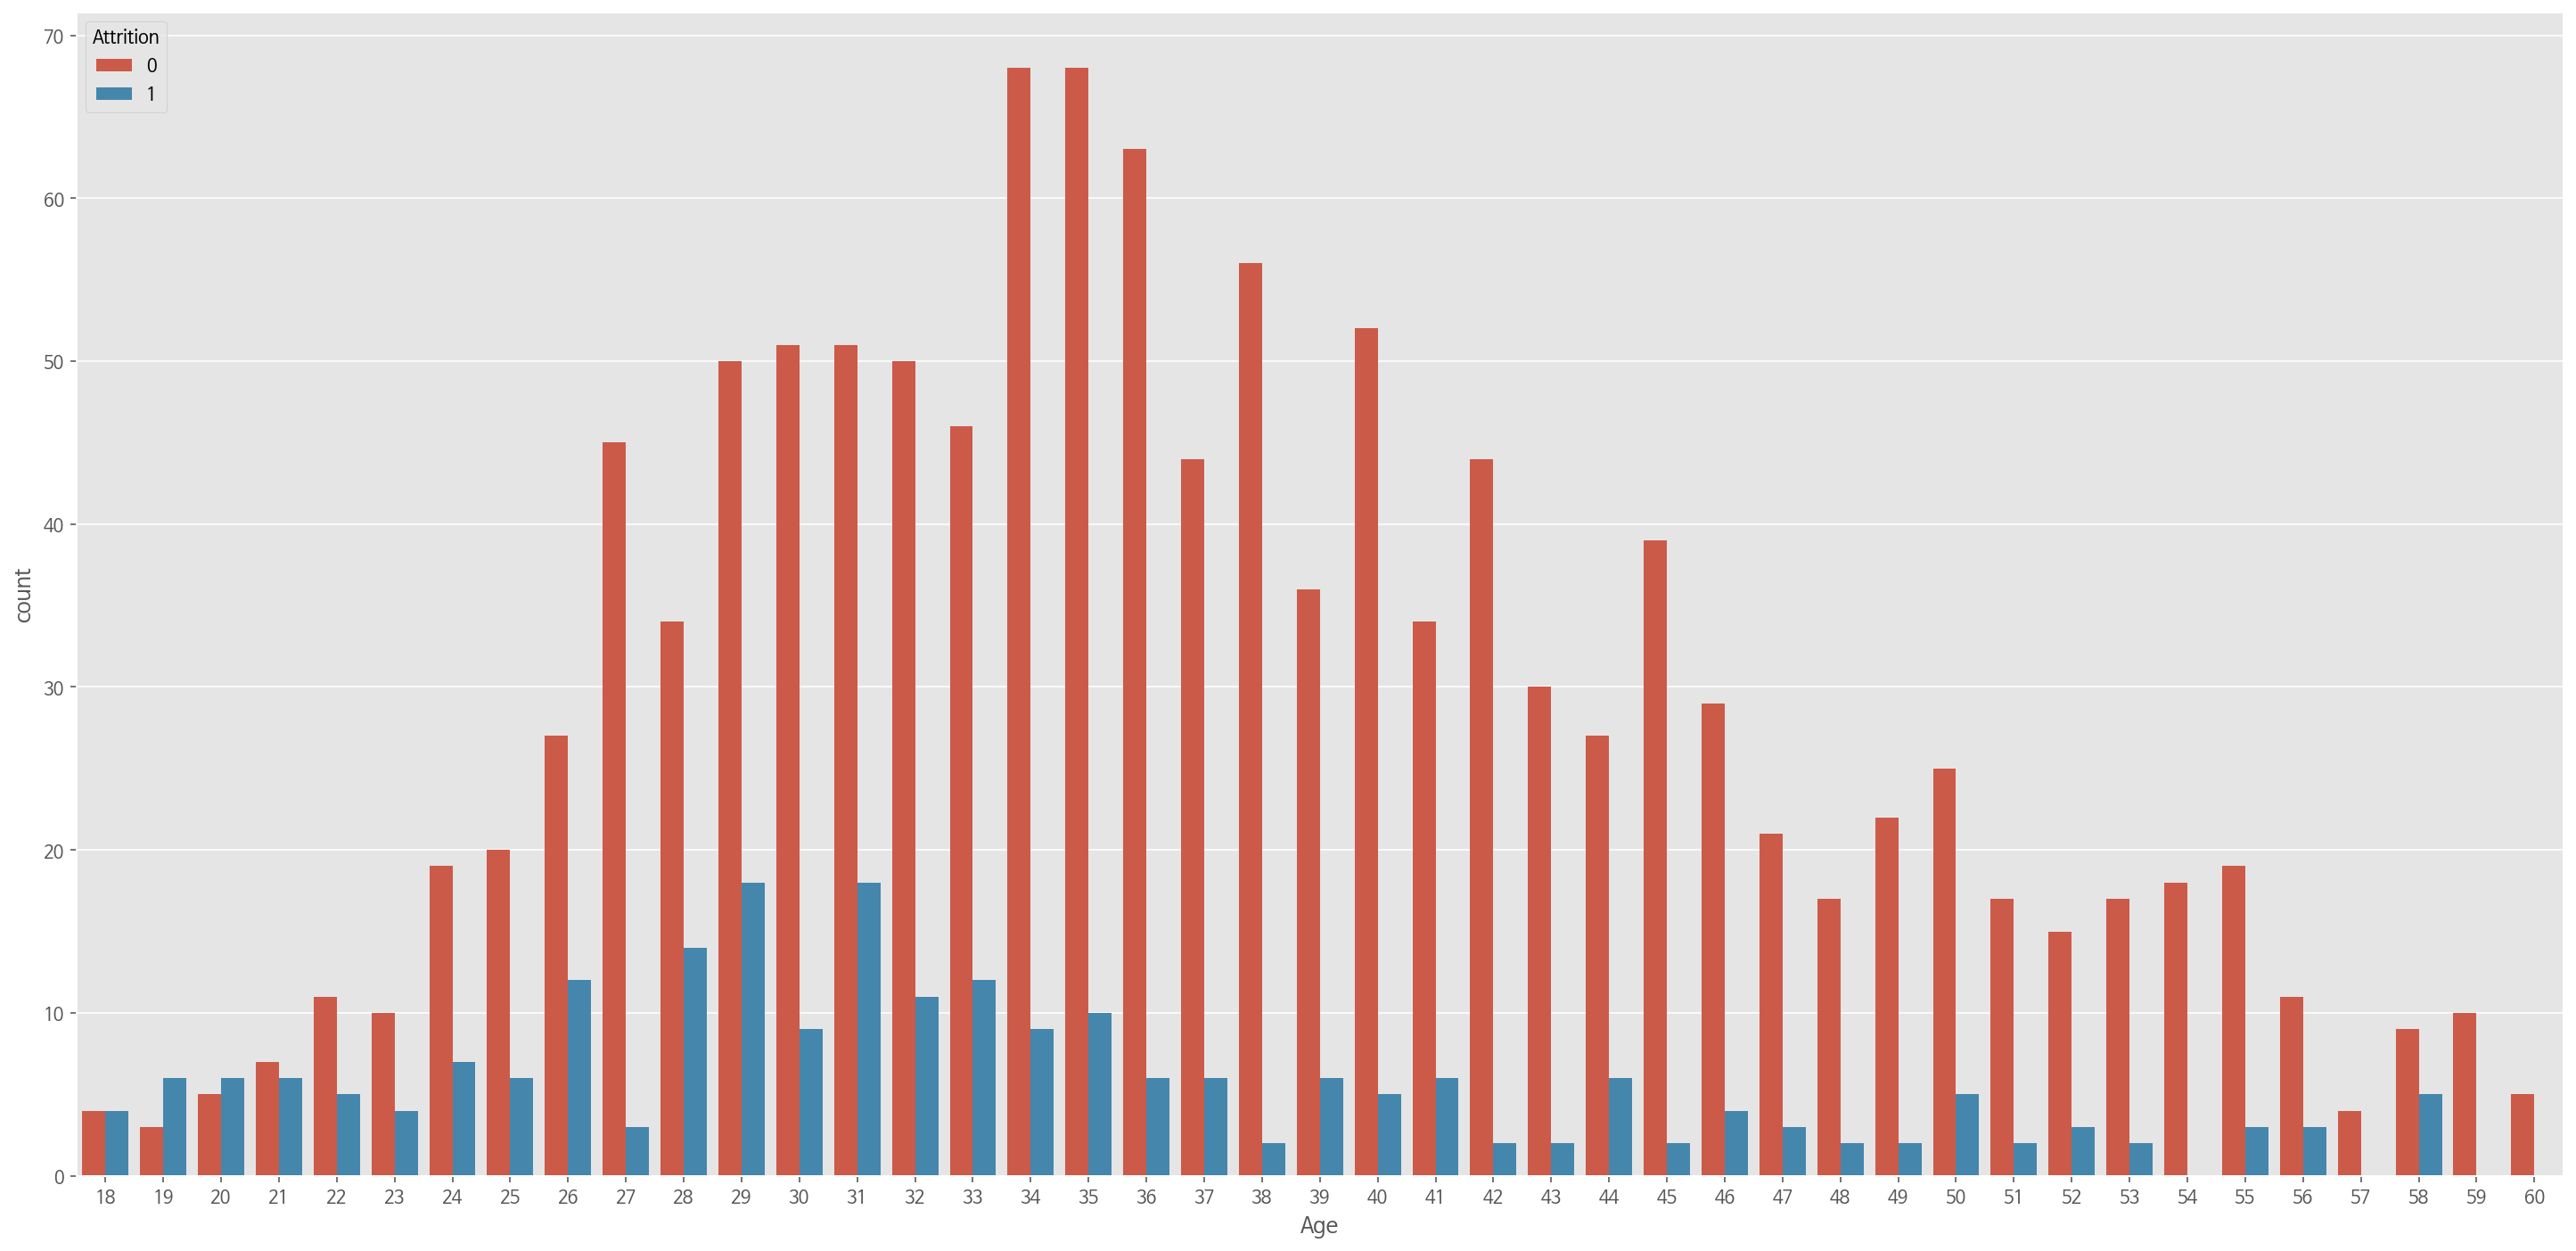

In [148]:
# 연령별 떠난/남은 직원 수의 분포 파악
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = data);

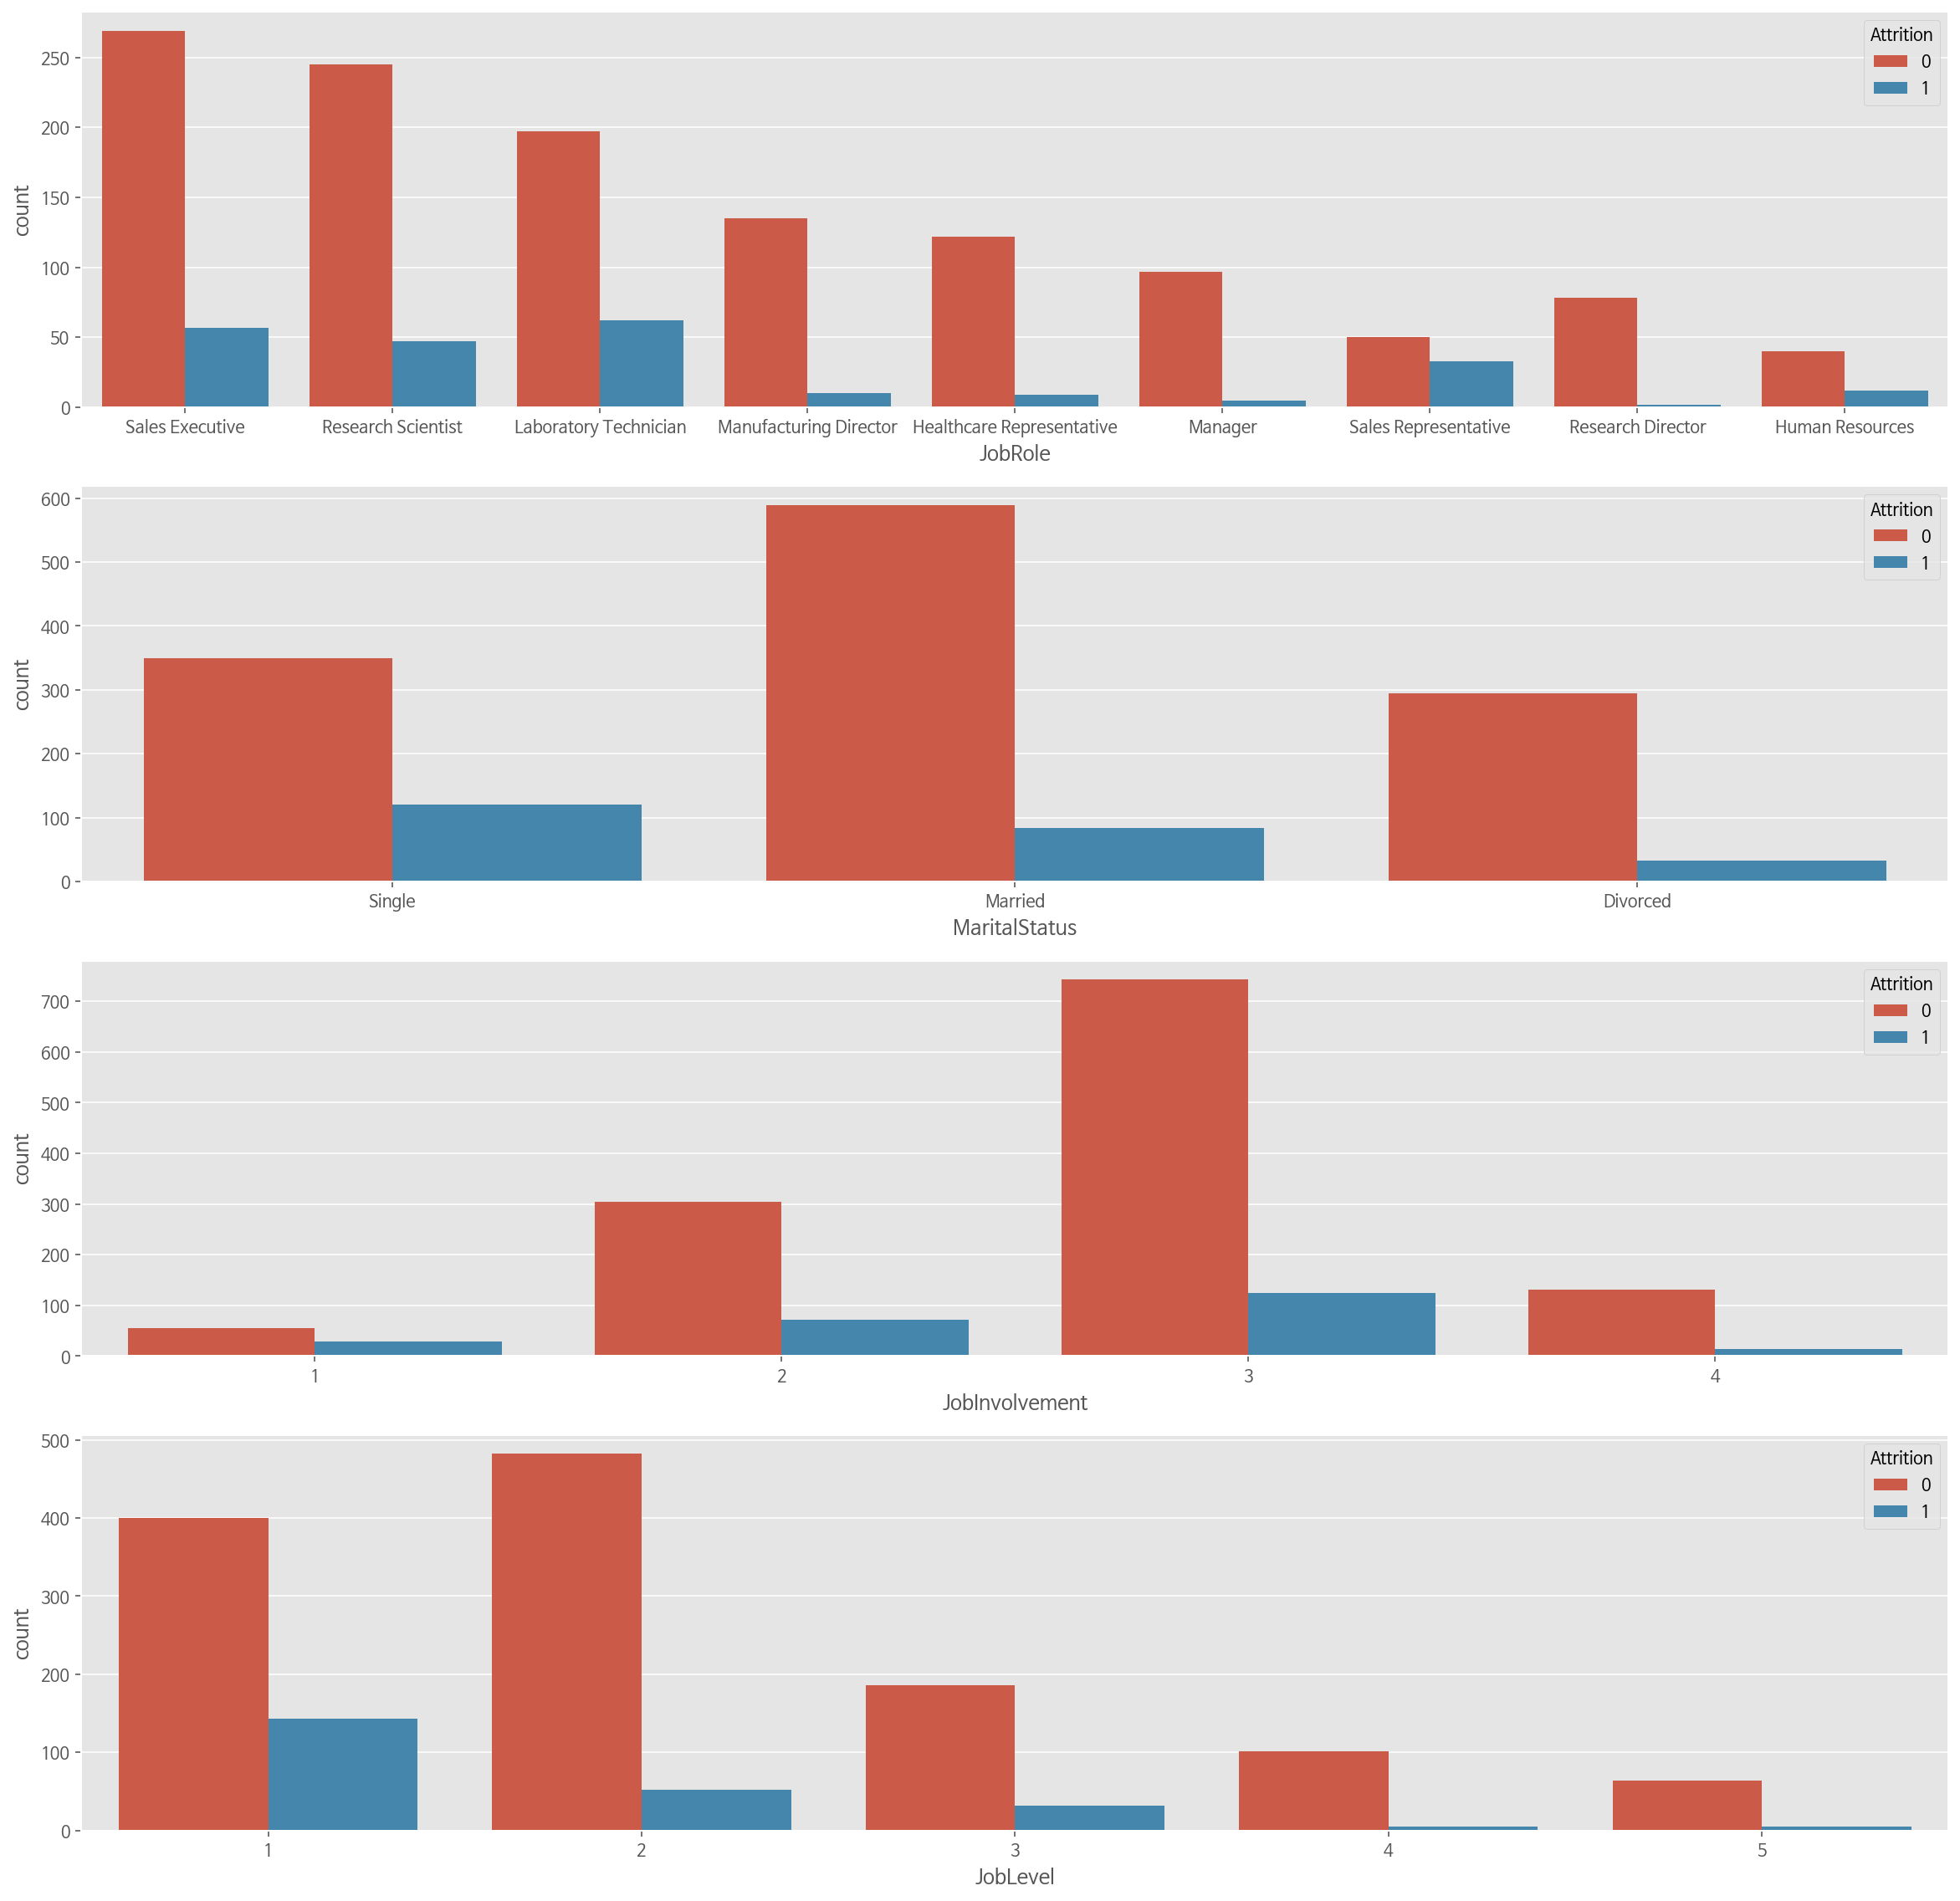

In [149]:
# 직무별, 혼인상태별, 직무참여도, 일수준별 떠난/남은 직원 빈도 수 분포 확인
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data);
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data);
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data);
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data);

**left/stayed별 각 데이터 요소(변수값)의 확률밀도분포 비교 탐색**
- 직장거리(DistanceFromHome)
- 전체 근속연수(TotalWorkingYears)
- 현재 상사와 함께 근속한 기간(YearsWithCurrManager)

KDE(커널 밀도 추정)를 활용하여 연속확률밀도함수 구현 가능

Text(0.5, 0, '직장거리')

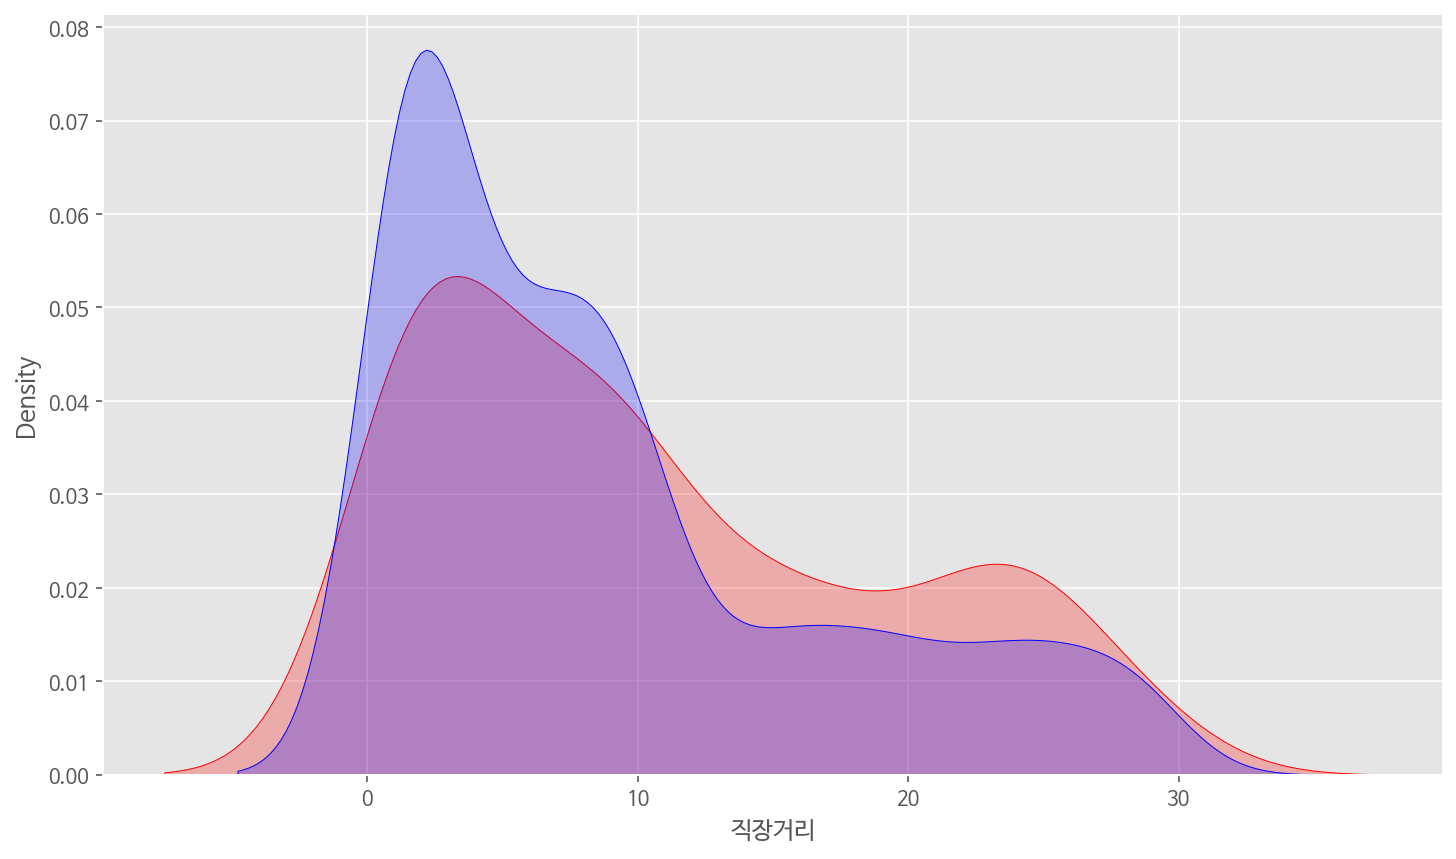

In [150]:
# 직장거리
plt.figure(figsize=(12,7))
sns.kdeplot(left_data['DistanceFromHome'], label = '떠난 직원', shade = True, color = 'r');
sns.kdeplot(stayed_data['DistanceFromHome'], label = '남은 직원', shade = True, color = 'b');
plt.xlabel('직장거리')

Text(0.5, 0, '전체 근속연수')

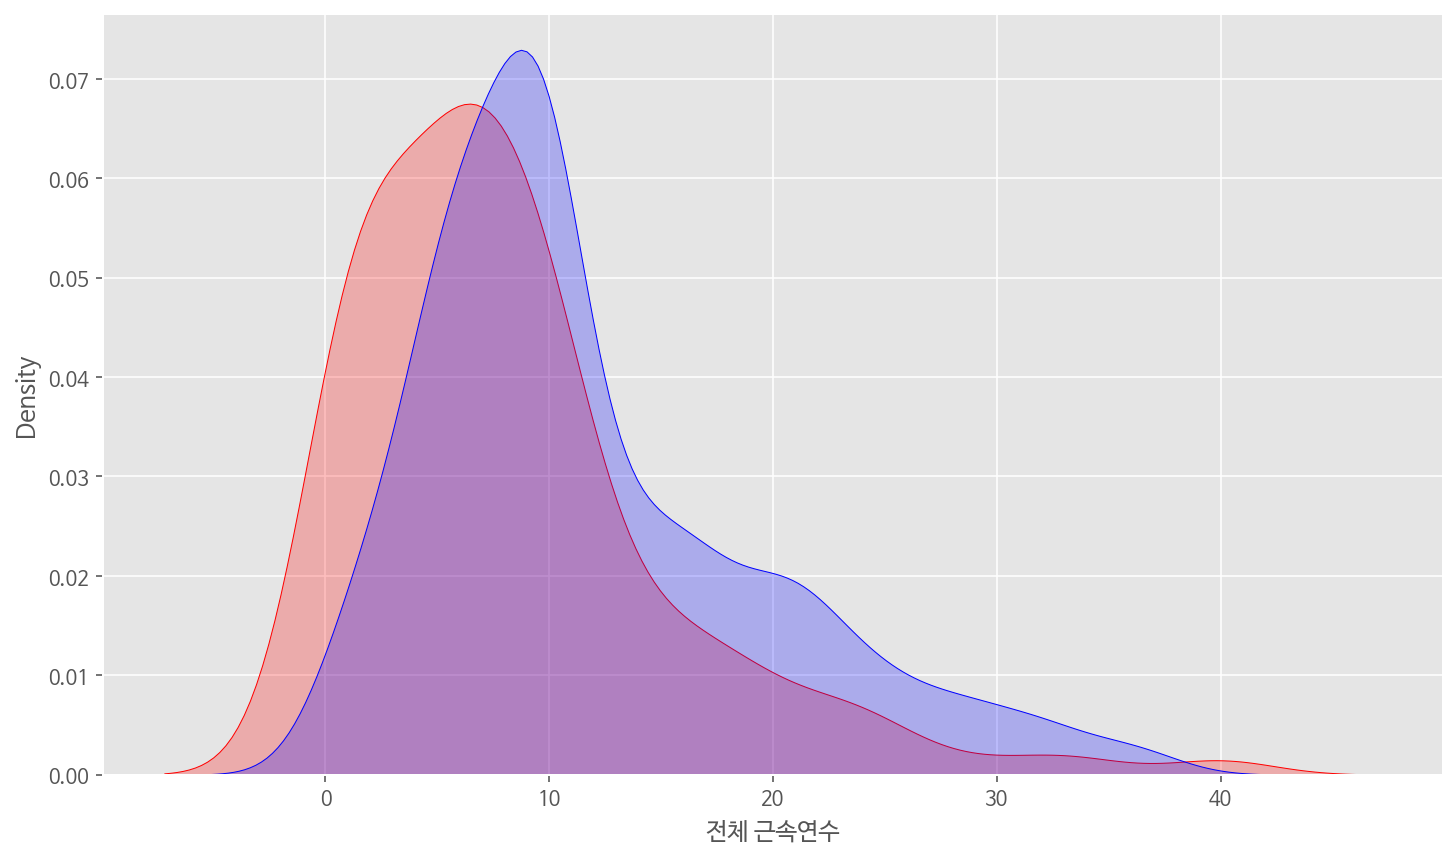

In [151]:
# 전체 근속연수
plt.figure(figsize=(12,7))
sns.kdeplot(left_data['TotalWorkingYears'], shade = True, label = '떠난 직원', color = 'r');
sns.kdeplot(stayed_data['TotalWorkingYears'], shade = True, label = '남은 직원', color = 'b');
plt.xlabel('전체 근속연수')

Text(0.5, 0, '현재 매니저와 함께한 근속연수')

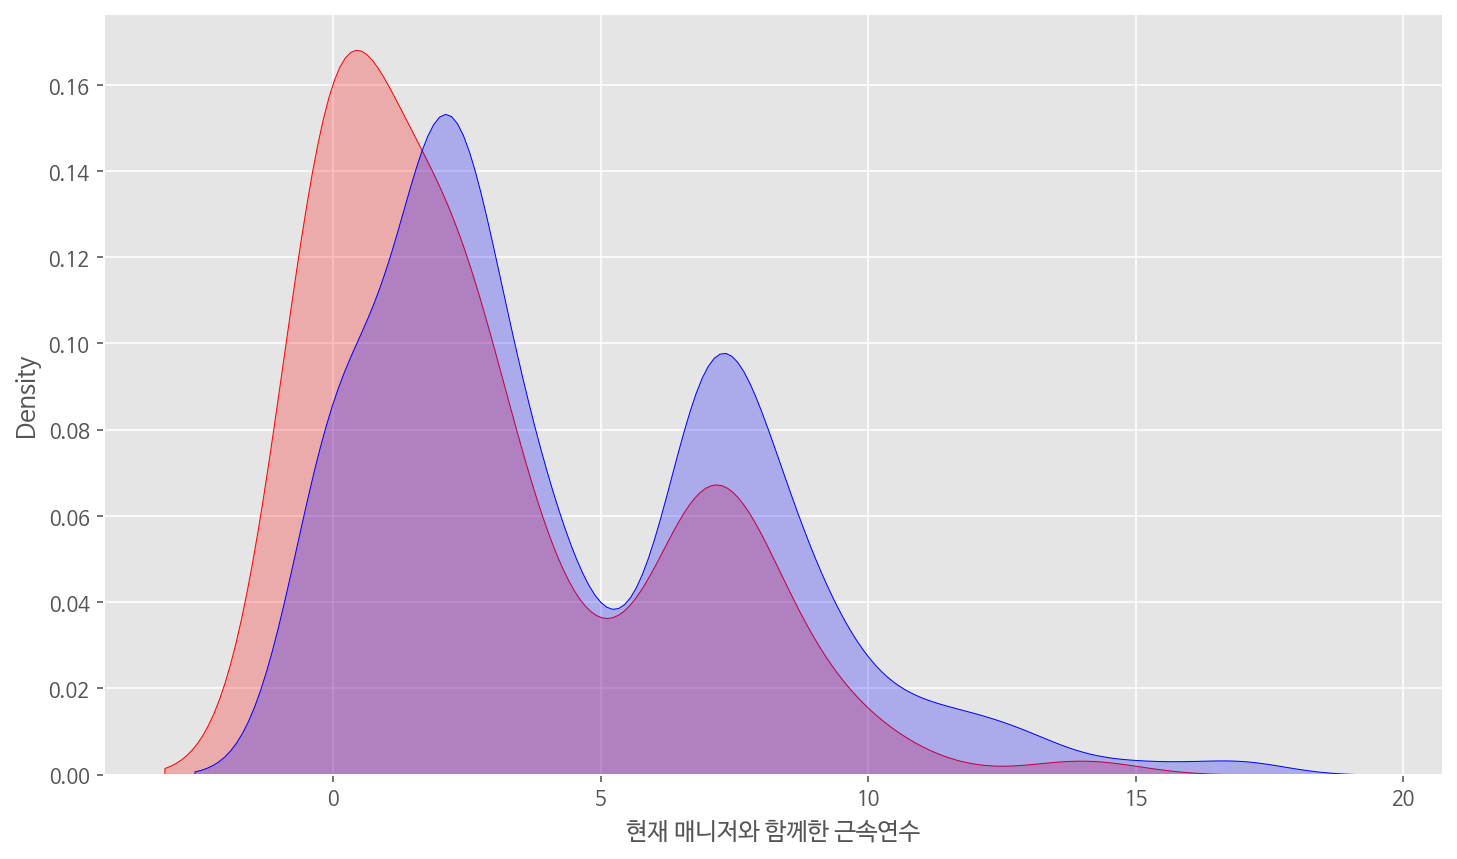

In [152]:
# 현재 상사와 함께 근속한 기간
plt.figure(figsize=(12,7))
sns.kdeplot(left_data['YearsWithCurrManager'], label = '떠난 직원', shade = True, color = 'r');
sns.kdeplot(stayed_data['YearsWithCurrManager'], label = '남은 직원', shade = True, color = 'b');
plt.xlabel('현재 매니저와 함께한 근속연수')

**boxplot을 활용하여 두 변수를 동시 비교 탐색**
- 월소득(MonthlyIncome)과 직무(JobRole)
- 월소득(MonthlyIncome)과 성별(Gender)

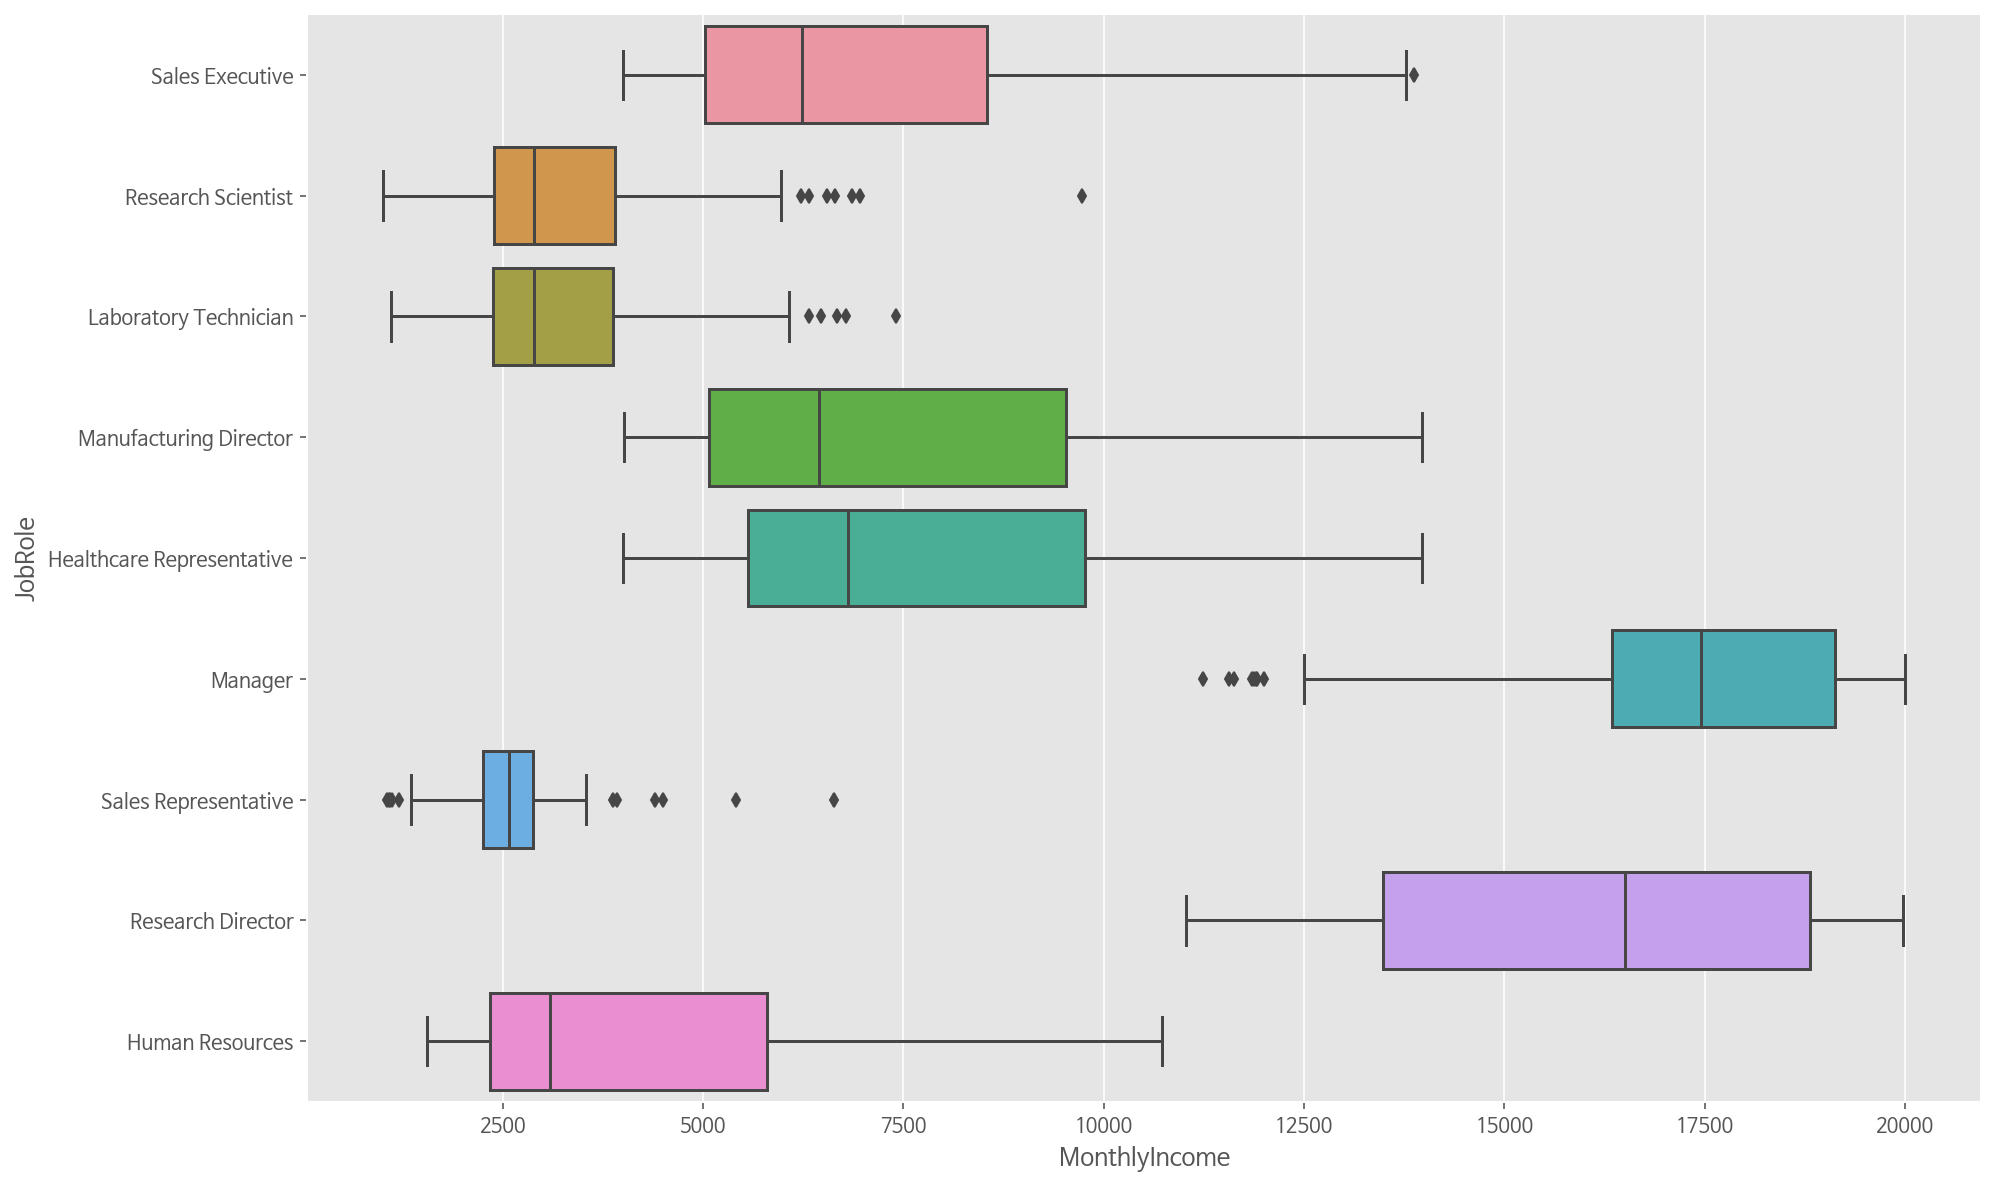

In [153]:
# 월소득(MonthlyIncome)-직무(JobRole)
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = data);

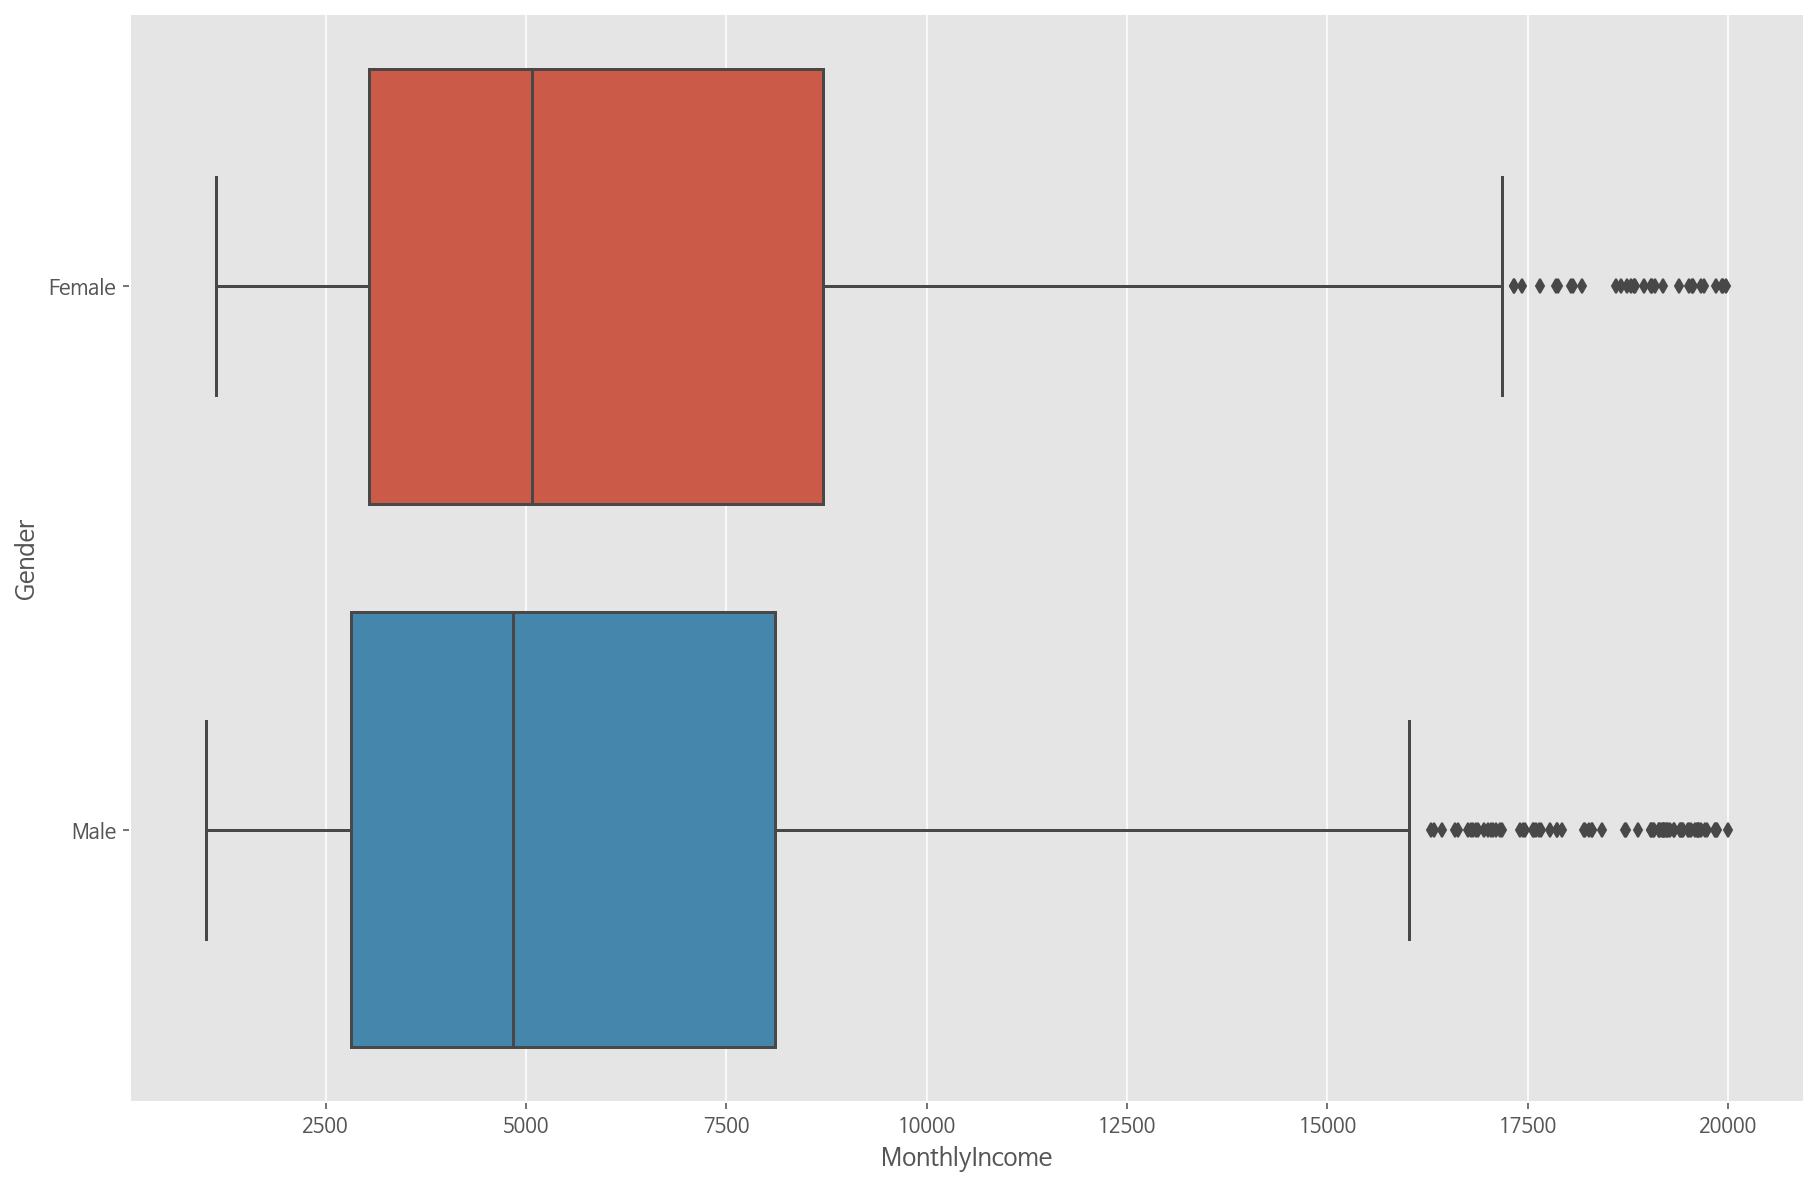

In [154]:
# 월소득(MonthlyIncome)-성별(Gender)
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = data);

## 2. 데이터 전처리 (Data Preprocessing)
- 문자(object) 데이터 인코딩
- 문자 인코딩 + 수치 데이터 합치기
- 데이터 스케일링(Scaler)

**2-1. 문자(object) 데이터 변환**

In [155]:
# 문자 변수 -> 머신러닝 모델이 이해할 수 있도록 변환 필요
X_category = data[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_category

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [156]:
# OneHotEncoding : 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_category = onehotencoder.fit_transform(X_category).toarray()

X_category.shape

(1470, 26)

In [157]:
X_category = pd.DataFrame(X_category)
X_category

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


**2-2. 문자 인코딩 + 수치 데이터 합치기**

In [158]:
# 수치형 변수들 별도로 추출한 후
X_numeric = data[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numeric

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [159]:
# 문자 인코딩 데이터(X_category) + 수치 데이터(X_numeric)
X_Refined = pd.concat([X_category, X_numeric], axis=1)

**2-3. 데이터 스케일링**
- MinMaxScaler
- 특히, 인공신경망 학습 전에 반드시 해줘야 함

In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_Refined)
X

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

## 3. 학습용데이터 세팅
- X: 스케일링 완료한 데이터셋
- y: 타겟변수, 종속변수
- split: 적절한 세트로 분리

In [161]:
# 종속변수(y) 준비
y = data['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [162]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [163]:
X_train.shape

(1102, 50)

In [164]:
X_test.shape

(368, 50)

## 4. Model & KPI
- 로지스틱 회귀 (LogisticRegression)
- 랜덤포레스트 분류 (RandomForestClassifier)
- 인공신경망 (Artificial Neural Network)

예측모형을 적합하여 도출한 후에 성능평가(KPI)를 확인해줘야 함

### 4-1. 로지스틱 회귀 (LogisticRegression)

In [165]:
# logistic regression fit
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [166]:
# predict
y_pred = model.predict(X_test)

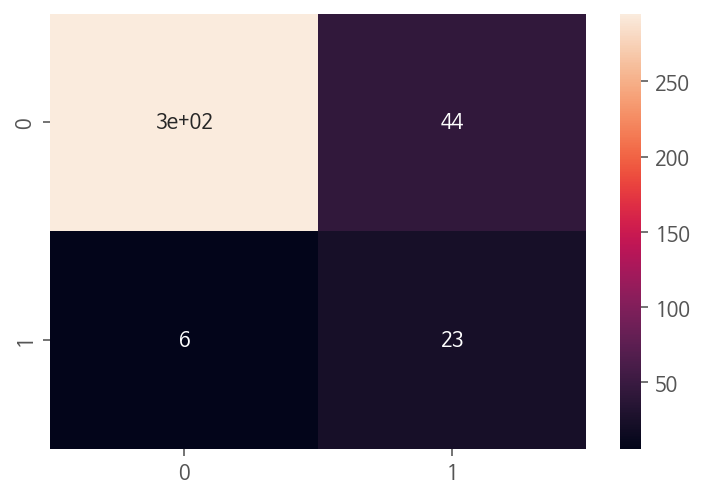

In [167]:
# confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);

In [169]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       301
           1       0.79      0.34      0.48        67

    accuracy                           0.86       368
   macro avg       0.83      0.66      0.70       368
weighted avg       0.86      0.86      0.84       368



### 4-2. 랜덤포레스트 분류 (RandomForestClassifier)

In [170]:
# randomforest classifier fit
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [171]:
# predict
y_pred = model.predict(X_test)

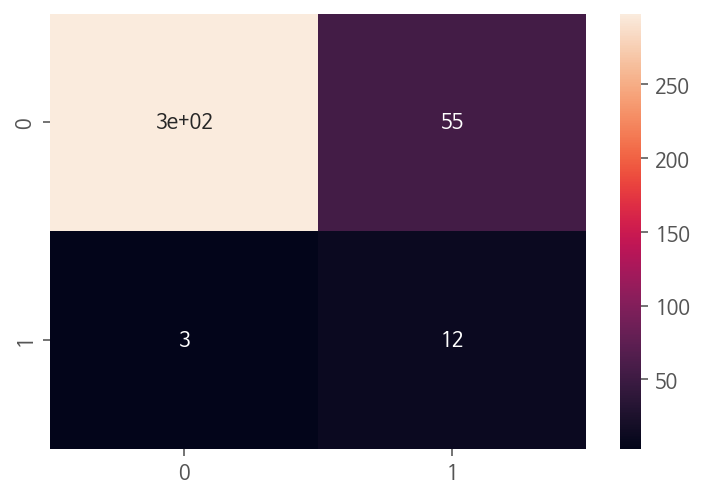

In [172]:
# confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);

In [173]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       301
           1       0.80      0.18      0.29        67

    accuracy                           0.84       368
   macro avg       0.82      0.58      0.60       368
weighted avg       0.84      0.84      0.80       368



### 4-3. 인공신경망 (Artificial Neural Network)

In [174]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               25500     
                                                                 
 dense_9 (Dense)             (None, 500)               250500    
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [175]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [176]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 1s 11ms/step - loss: 0.4168 - accuracy: 0.8448
Epoch 2/100
23/23 [==============================] - 0s 12ms/step - loss: 0.3434 - accuracy: 0.8648
Epoch 3/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2912 - accuracy: 0.8902
Epoch 4/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2857 - accuracy: 0.8984
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2643 - accuracy: 0.8938
Epoch 6/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2161 - accuracy: 0.9220
Epoch 7/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1922 - accuracy: 0.9310
Epoch 8/100
23/23 [==============================] - 0s 11ms/step - loss: 0.1749 - accuracy: 0.9211
Epoch 9/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1496 - accuracy: 0.9374
Epoch 10/100
23/23 [==============================] - 0s 11ms/step - loss: 0.1097 - accuracy: 0.9610

In [177]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

**손실함수 그래프**

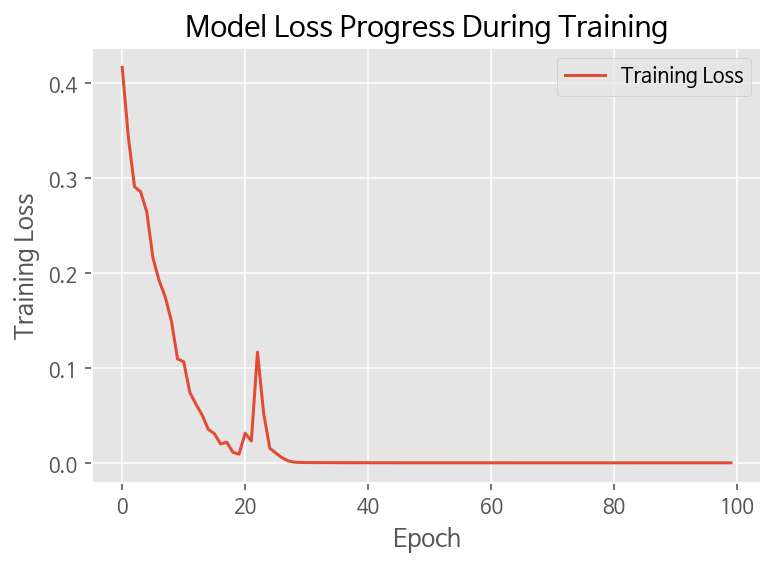

In [178]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

**정확도 그래프**

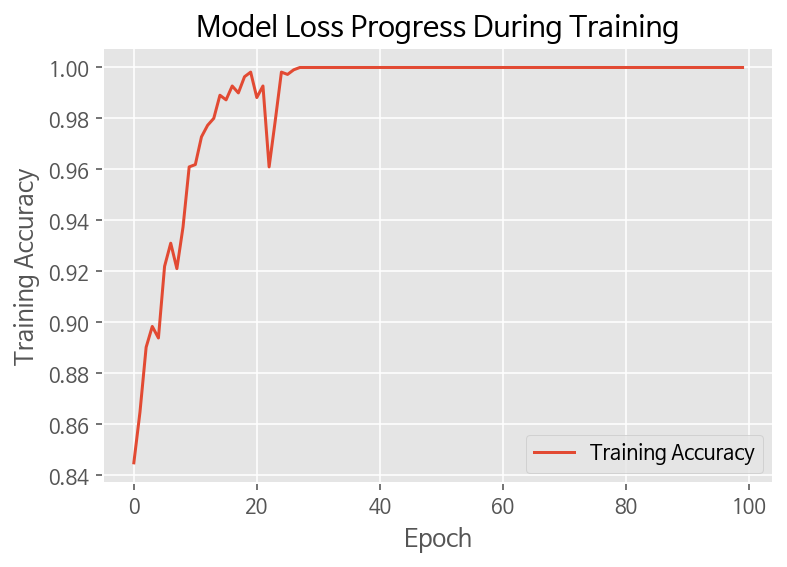

In [179]:
plt.plot(epochs_hist.history['accuracy']);
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

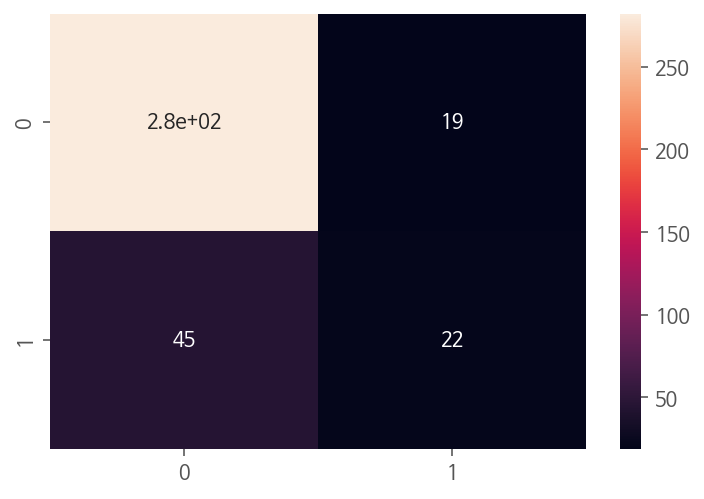

In [180]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       301
           1       0.54      0.33      0.41        67

    accuracy                           0.83       368
   macro avg       0.70      0.63      0.65       368
weighted avg       0.80      0.83      0.81       368



<br>

---

<br>

해외 모기업 인사 관련 Dataset에서 탐색적 데이터 분석, 데이터 전처리 과정을 거쳐서
적절한 모델 3개를 선정하여 모델링하고, 적합하여 성능평가를 수행함.

분명 더 좋은 성능을 구현할 수 있는 아이디어들이 있을 것임.

그것이 피처엔지니어링(feature engineering) 등을 통해 유의미할 것 같은 데이터 변수를 추가해서 학습시키는 것 또는 다른 전처리 기법을 도입하는 것 등 다양한 방법들이 있음.

하지만, 모든 것의 중요한 것은 Business/Domain이 가장 중요함